In [2]:
import torch 
import os
import PmP_traveltime_Net as PTN

# Device configuration
cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
batch_size = 128
num_epochs = 200
learning_rate = 5e-4

# Paths for different folders, data and result folders
datadir="Data"
wdir="Train_PTN_result"
if not os.path.exists(wdir):
    os.makedirs(wdir)

# Train PmP-traveltime-Net

To improve the prediction accuracy of PmP traveltime, we design “PmP-traveltime-Net” 
to predict the difference in traveltime between PmP and first P waves. 

We train (80%) and validate (20%) PmP-traveltime-Net on 10,000 waveform data with clear 
PmP waves prepared by the two-stage workflow (Li et al., 2022).


In [3]:
# read in the training data 
train_loader, test_loader = PTN.readin_data_train(datadir,"TrainData_PmP_traveltime_Net",batch_size)

In [3]:
# train PmP-traveltime-Net
PTN.NetTrain(wdir,"train_PTN_log","net_PTN_model",train_loader,learning_rate,num_epochs,batch_size,device)

Epoch [1/200],  Step [1/63],  Loss: 0.995161
Epoch [1/200],  Step [51/63],  Loss: 0.150858
Epoch [2/200],  Step [1/63],  Loss: 0.125670
Epoch [2/200],  Step [51/63],  Loss: 0.103417
Epoch [3/200],  Step [1/63],  Loss: 0.126398
Epoch [3/200],  Step [51/63],  Loss: 0.101992
Epoch [4/200],  Step [1/63],  Loss: 0.071481
Epoch [4/200],  Step [51/63],  Loss: 0.122102
Epoch [5/200],  Step [1/63],  Loss: 0.088377
Epoch [5/200],  Step [51/63],  Loss: 0.088543
Epoch [6/200],  Step [1/63],  Loss: 0.087781
Epoch [6/200],  Step [51/63],  Loss: 0.078219
Epoch [7/200],  Step [1/63],  Loss: 0.096996
Epoch [7/200],  Step [51/63],  Loss: 0.116007
Epoch [8/200],  Step [1/63],  Loss: 0.057715
Epoch [8/200],  Step [51/63],  Loss: 0.067225
Epoch [9/200],  Step [1/63],  Loss: 0.094174
Epoch [9/200],  Step [51/63],  Loss: 0.071192
Epoch [10/200],  Step [1/63],  Loss: 0.057563
Epoch [10/200],  Step [51/63],  Loss: 0.057397
Epoch [11/200],  Step [1/63],  Loss: 0.059701
Epoch [11/200],  Step [51/63],  Loss: 0.05

In [4]:
# model evaluation on test data
PTN.netevalu(wdir,"net_PTN_model","predict_PTN_file",test_loader,device)

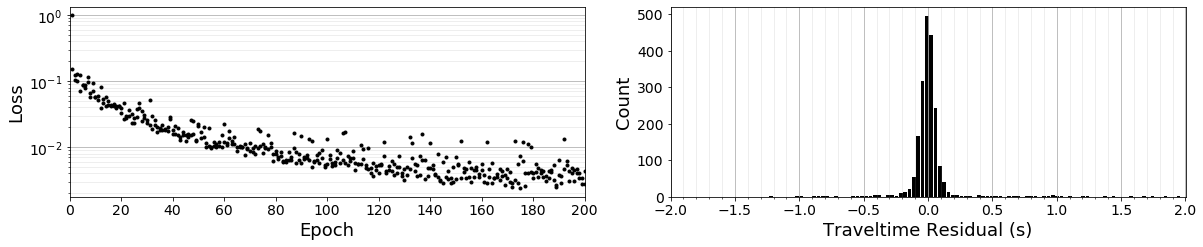

In [5]:
# quickly visualize the result
PTN.plot_modeva(wdir,"train_PTN_log","predict_PTN_file","plot_PTN_modevalu")

# Apply pre-trained PmP-traveltime-Net to predicting PmP traveltimes on real data

PmP-traveltime-Net only outputs the predicted differential traveltime. We then compute 
the absolute PmP traveltime from source to receiver by adding the P-wave traveltime to 
the predicted differential traveltime. 

We use PmP-traveltime-Net only to predict the PmP traveltimes for the
waveforms which are identified already to contain clear PmP waves.

### Applied to all the final picks

In [6]:
# read in the real data 
test_loader = PTN.readin_data_real(datadir,"ValidationData_final",batch_size)

In [7]:
# give PmP traveltime prediction on real data
PTN.netpredict(datadir,"ValidationData_final",wdir,"net_PTN_model","predict_PTN_file_validfinal",test_loader,device)

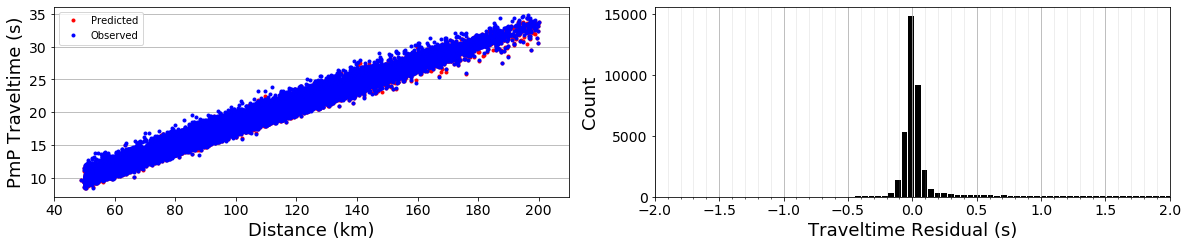

In [2]:
# plot the comparison between predicted and manually picked PmP travletimes
PTN.plot_predict_compare(wdir,"predict_PTN_file_validfinal","plot_PTN_predict_compare")

### Applied to certain year

In [2]:
# read in the real data 
test_loader = PTN.readin_data_real(datadir,"ValidationData_2015",batch_size)

In [3]:
# give PmP traveltime prediction on real data
PTN.netpredict(datadir,"ValidationData_2015",wdir,"net_PTN_model","predict_PTN_file_2015",test_loader,device)

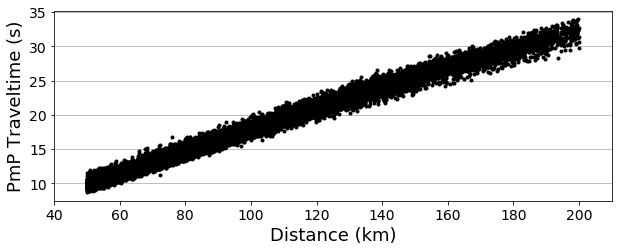

In [4]:
# plot the net-predicted PmP travletimes
PTN.plot_predict(wdir,"predict_PTN_file_2015","plot_PTN_predict_2015")

###### 